In [1]:
#import os
#import urllib2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import image
import astropy.coordinates as coord
import astropy.units as u
import requests
import casjobs as c

from scipy import integrate
import ch_sdss_red as ch

%matplotlib inline

In [2]:
CASJOBS_WSID='518745586'
CASJOBS_PW='Champi0n$$$'

query = """SELECT *
INTO mydb.pisces3
FROM Stripe82..Field AS p
WHERE p.mjd_g > 0 AND p.ramin < 355 AND p.ramax > 355
"""

jobs = c.CasJobs(userid=CASJOBS_WSID,password=CASJOBS_PW)
job_id = jobs.submit(query)
status = jobs.monitor(job_id)
print status

(4, 'failed')


In [3]:
def download_casjob_nearbyobj(ra,dec,radius):
    # radius = arcmin
    CASJOBS_WSID='518745586'
    CASJOBS_PW='Champi0n$$$'
    
    query_sdss="""SELECT
    p.ObjID, p.ra, p.dec, n.distance, p.modelMag_u, p.modelMagErr_u, p.modelMag_g, p.modelMagErr_g, p.modelMag_r, p.modelMagErr_r,
    p.modelMag_i, p.modelMagErr_i, p.modelMag_z, p.modelMagErr_z, z.z, z.zErr
    INTO mydb.MyTable%i
    FROM PhotoObj p
      JOIN dbo.fGetNearbyObjEq(%s,%s,%s) n ON n.objID = p.objID, 
      PhotoZ z
    WHERE
      p.type = 3
      and p.objID = z.objID""" % (0,str(ra),str(dec),str(radius))

    fname='/Users/taweewat/Documents/xray_project/code_github/casjob/data/tmp_casjob.csv'
    
    jobs = c.CasJobs(userid=CASJOBS_WSID,password=CASJOBS_PW)
    
    job_id0 = jobs.submit(query_sdss, context='DR13')
    status = jobs.monitor(job_id0); print status    
    jobs.request_and_get_output('MyTable0','CSV',fname)
    jobs.drop_table('MyTable0')
    return pd.read_csv(fname)

In [4]:
def d_A(z0,omega_m=0.3,omega_l=0.7,H0=71):
    #unit Mpc
    c=3e5
    X=c/H0*integrate.quad(lambda z: 1./(np.sqrt(omega_m*(1+z)**3+omega_l+(1.-omega_m-omega_l)*(1+z)**2)),0.,z0)[0]
    return 1./(1+z0)*X

def rad_A(z0,omega_m=0.3,omega_l=0.7,H0=71):
    #unit arcmin for 1 Mpc scale 
    def d_A(z0,omega_m=omega_m,omega_l=omega_l,H0=H0):
        #unit Mpc
        c=3e5
        X=c/H0*integrate.quad(lambda z: 1./(np.sqrt(omega_m*(1+z)**3+omega_l+(1.-omega_m-omega_l)*(1+z)**2)),0.,z0)[0]
        return 1./(1+z0)*X
    return 1./d_A(z0)*180./np.pi*60

In [6]:
dff=pd.read_csv('/Users/taweewat/Documents/xray_project/ned-result/final_cut3.csv')
dff_sdss=dff[dff.followup=='followed']
#dff_sdss.loc[96].ra_m
#rad_A(dff_sdss.loc[ind].redshift)

In [9]:
# rad_A(dff_sdss.redshift)

In [11]:
ind=96
x0,y0=dff_sdss.loc[ind].ra_m,dff_sdss.loc[ind].dec_m
df2=download_casjob_nearbyobj(x0,y0,0.5)

(5, 'finished')


In [22]:
dff_sdss.loc[ind].ra_m,dff_sdss.loc[ind].dec_m

(214.69776000000002, 30.467959999999998)

In [46]:
df2

,ObjID,ra,dec,distance,modelMag_u,modelMagErr_u,modelMag_g,modelMagErr_g,modelMag_r,modelMagErr_r,modelMag_i,modelMagErr_i,modelMag_z,modelMagErr_z,z,zErr
0,1237665127481278575,214.699354,30.468319,0.085213,25.20463,0.756960,23.95968,0.326420,22.46032,0.149785,21.50737,0.096438,21.00323,0.238315,0.618136,0.057983
1,1237665127481279037,214.696884,30.471571,0.221329,26.10009,1.276335,21.92822,0.173794,20.17017,0.062077,19.27665,0.044115,18.54266,0.087767,0.514600,0.031457
2,1237665127481278574,214.697796,30.467841,0.007368,19.32341,0.027690,18.88560,0.009216,18.75876,0.010381,18.49096,0.011155,18.38230,0.031167,0.103276,0.032623
3,1237665127481279425,214.700551,30.465069,0.225643,26.21714,0.434275,23.99086,0.381646,22.46617,0.174112,21.24854,0.091422,20.68850,0.211602,0.630807,0.054095
4,1237665127481279427,214.701215,30.467043,0.186953,24.65612,1.054084,24.94226,0.616567,22.67107,0.217199,22.63095,0.309918,22.39122,0.736081,0.277152,0.060720
5,1237665127481279431,214.702625,30.463363,0.373344,24.89936,1.626916,24.68874,0.936526,21.94662,0.190266,23.75886,1.147020,22.89613,1.339810,0.217817,0.070153
6,1237665127481278576,214.700069,30.470291,0.183919,24.77171,1.951997,23.00399,0.330213,21.44375,0.138643,20.43327,0.087657,19.98482,0.227947,0.540322,0.041204
7,1237665127481278577,214.696827,30.465984,0.128012,24.88215,0.889489,24.95409,0.531527,22.58327,0.173257,21.35264,0.089316,20.35410,0.144228,-9999.000000,-9999.000000
8,1237665127481278579,214.695735,30.466585,0.133292,25.11892,0.908085,24.65466,0.545588,22.59359,0.198141,21.51956,0.116003,21.93165,0.567257,0.575649,0.104809
9,1237665127481279038,214.695801,30.472944,0.315714,24.28109,2.001524,22.52586,0.237199,20.90836,0.093661,19.99240,0.065761,19.46444,0.157374,0.522123,0.039144


In [9]:
#fetch_image1(x0, y0, 1)
print ch.fetch_image1(x0, y0, 1)

downloads/img001_214.69776000+30.46796000.jpg
downloads/img001_214.69776000+30.46796000.jpg


In [10]:
#df=pd.read_csv('/Users/taweewat/Documents/xray_project/code_github/casjob/data/test02_2min.csv')

In [11]:
df=df2

downloads/img001_214.69776000+30.46796000.jpg


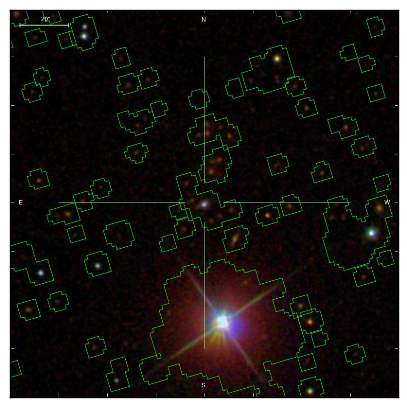

In [12]:
I=image.imread(ch.fetch_image1(x0, y0, 1)) #scale = 0.2"/pixel
fig,ax=plt.subplots(1,figsize=(5,5))
ax.imshow(I)
#ax.plot([400-d_ra],[400+d_dec],'x',color='red')
#ax.axis([0,800,0,800])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

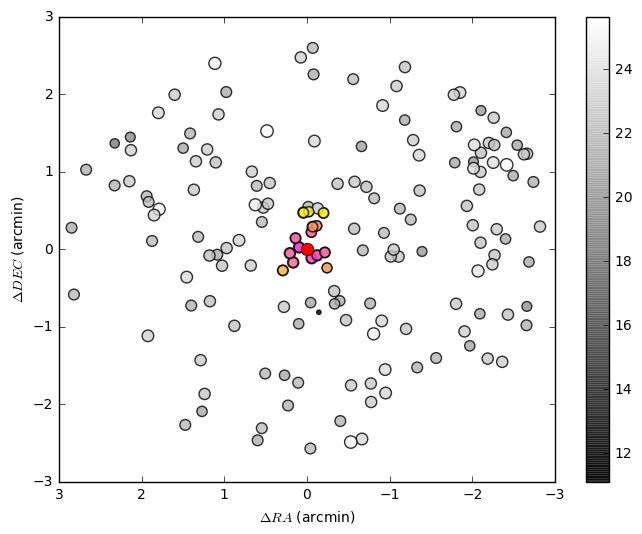

In [13]:
 
dra = coord.Angle(df.ra*u.degree-x0*u.degree)
dra = dra.wrap_at(180*u.degree).to(u.arcmin)
ddec = coord.Angle(df.dec*u.degree-y0*u.degree).to(u.arcmin)
color=df.modelMag_r#/np.max(df.r.values)
dist=df.distance
sizes=np.array(map(int,df.modelMag_r.values))

sx=3.
cax=plt.scatter(dra,ddec,c=color.values,\
            s=(sizes-np.mean(sizes)-np.min(sizes-np.mean(sizes)))*5.+10,cmap='gray',alpha=0.8)
plt.colorbar(cax)#, ticks=[-, 1])
plt.plot([0],[0],'o',color='red',alpha=1.,markersize=9)

loc=df.distance<0.5
plt.scatter(pd.Series(dra)[loc],pd.Series(ddec)[loc],c=dist[loc],cmap='spring',alpha=0.8,s=50)

#plt.axvline(-0.322,ls='--')
plt.axis([+sx,-sx,-sx,+sx])
plt.xlabel('$\Delta RA$ (arcmin)')
plt.ylabel('$\Delta DEC$ (arcmin)')

[17, 27, -4, 4]

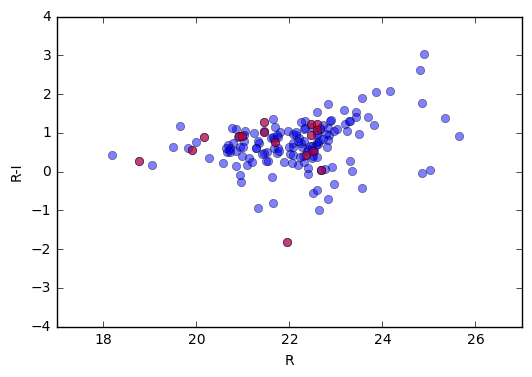

In [12]:
plt.plot(df.modelMag_r,df.modelMag_r-df.modelMag_i,'o',alpha=0.5)
plt.plot(df.modelMag_r[loc],df.modelMag_r[loc]-df.modelMag_i[loc],'o',c='red',alpha=0.5)
plt.xlabel('R')
plt.ylabel('R-I')
plt.axis([17,27,-4,4])

In [ ]:
plt.plot(pd.Series(dra),'o')

plt.plot(pd.Series(dra)[loc],'.')